# Группировка данных

In [1]:
import pandas as pd

bikes = pd.read_csv('data/BikesDataVars.csv')

In [2]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,False,False,257,0,Freezing,False,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,False,False,219,0,Freezing,False,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,False,False,162,0,Freezing,False,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,False,False,148,1,Freezing,False,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,False,False,97,0,Freezing,False,0


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  8760 non-null   object 
 1   Hour                  8760 non-null   int64  
 2   Temperature           8581 non-null   float64
 3   Humidity              8760 non-null   int64  
 4   Wind speed            8760 non-null   float64
 5   Rainfall              8760 non-null   float64
 6   Snowfall              8760 non-null   float64
 7   Seasons               8760 non-null   object 
 8   Holiday               8760 non-null   bool   
 9   Functioning Day       8760 non-null   bool   
 10  Rental Count          8760 non-null   int64  
 11  Normal Humidity       8760 non-null   int64  
 12  Temperature Category  8581 non-null   object 
 13  Windy                 8760 non-null   bool   
 14  Good Weather          8760 non-null   int64  
dtypes: bool(3), float64(4

### Суперметод, который спасает на экзамене
`.describe()` - как вывести много статистики за раз

In [4]:
bikes.describe()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Rental Count,Normal Humidity,Good Weather
count,8760.000000,8581.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000,8760.000000
mean,11.500000,12.878557,58.226256,1.724909,0.148687,0.075068,696.582078,0.34532,0.092694
std,6.922582,11.955551,20.362413,1.036300,1.128193,0.436746,749.812613,0.47550,0.290020
min,0.000000,-17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,5.750000,3.400000,42.000000,0.900000,0.000000,0.000000,157.000000,0.00000,0.000000
50%,11.500000,13.700000,57.000000,1.500000,0.000000,0.000000,425.500000,0.00000,0.000000
75%,17.250000,22.500000,74.000000,2.300000,0.000000,0.000000,1009.000000,1.00000,0.000000
max,23.000000,39.400000,98.000000,7.400000,35.000000,8.800000,6012.000000,1.00000,1.000000


In [6]:
# стандартное отклонение?
bikes['Temperature'].std()

11.955551492287729

In [7]:
# Q1, Q2 (как ещё называется? - медиана), Q3?
bikes['Temperature'].quantile([0.25])
bikes['Temperature'].median()
bikes['Temperature'].quantile([0.75])

0.75    22.5
Name: Temperature, dtype: float64

In [8]:
# мода?
bikes['Temperature'].mode()

0    23.4
Name: Temperature, dtype: float64

## Группировка

`.value_counts()` - каких значений сколько

In [9]:
bikes['Temperature Category'].unique()

array(['Freezing', 'Chilly', nan, 'Nice', 'Hot'], dtype=object)

In [10]:
bikes['Temperature Category'].value_counts()

Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
Name: Temperature Category, dtype: int64

In [11]:
bikes['Temperature Category'].value_counts(dropna=False)

Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
NaN          179
Name: Temperature Category, dtype: int64

In [12]:
bikes['Good Weather'].value_counts()

0    7948
1     812
Name: Good Weather, dtype: int64

`.groupby('столбец')` - группировка по столбцу(ам)

In [13]:
# сколько велосипедов в каждый из дней
bikes.groupby('Date')['Rental Count'].sum()

Date
2017-12-01     9802
2017-12-02     8404
2017-12-03     8644
2017-12-04     9556
2017-12-05     6578
              ...  
2018-11-26    13934
2018-11-27    13964
2018-11-28    17378
2018-11-29    18058
2018-11-30    17543
Name: Rental Count, Length: 365, dtype: int64

Что происходит внутри группировки?

In [17]:
list(bikes.groupby('Date'))[0]  # создаётся таблица про каждый из дней

('2017-12-01',
           Date  Hour  Temperature  Humidity  Wind speed  Rainfall  Snowfall  \
 0   2017-12-01     0         -5.2        37         2.2       0.0       0.0   
 1   2017-12-01     1         -5.5        38         0.8       0.0       0.0   
 2   2017-12-01     2         -6.0        39         1.0       0.0       0.0   
 3   2017-12-01     3         -6.2        40         0.9       0.0       0.0   
 4   2017-12-01     4         -6.0        36         2.3       0.0       0.0   
 5   2017-12-01     5         -6.4        37         1.5       0.0       0.0   
 6   2017-12-01     6         -6.6        35         1.3       0.0       0.0   
 7   2017-12-01     7         -7.4        38         0.9       0.0       0.0   
 8   2017-12-01     8         -7.6        37         1.1       0.0       0.0   
 9   2017-12-01     9         -6.5        27         0.5       0.0       0.0   
 10  2017-12-01    10         -3.5        24         1.2       0.0       0.0   
 11  2017-12-01    11    

In [19]:
list(bikes.groupby('Date'))[0][1].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,False,False,257,0,Freezing,False,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,False,False,219,0,Freezing,False,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,False,False,162,0,Freezing,False,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,False,False,148,1,Freezing,False,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,False,False,97,0,Freezing,False,0


In [15]:
len(list(bikes.groupby('Date')))

365

`.size()` и `.value_counts()` - каких значений сколько

`.size()` сортирует по названию группы, а не по количеству

In [20]:
bikes['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [21]:
bikes.groupby('Seasons').size()

Seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
dtype: int64

In [22]:
# что выведется?
bikes.groupby('Seasons')['Temperature Category'].value_counts()

Seasons  Temperature Category
Autumn   Chilly                  1138
         Nice                     894
         Hot                       86
         Freezing                  20
Spring   Chilly                  1224
         Nice                     881
         Hot                       27
         Freezing                  22
Summer   Hot                     1166
         Nice                    1003
Winter   Freezing                1370
         Chilly                   750
Name: Temperature Category, dtype: int64

In [23]:
# В какой сезон какая средняя влажность?
bikes.groupby('Seasons')['Humidity'].mean()

Seasons
Autumn    59.228480
Spring    58.776721
Summer    64.981431
Winter    49.744907
Name: Humidity, dtype: float64

In [24]:
# В какой сезон сколько велосипедов взяли?
bikes.groupby('Seasons')['Rental Count'].sum()

Seasons
Autumn    1769901
Spring    1608905
Summer    2239926
Winter     483327
Name: Rental Count, dtype: int64

In [25]:
# группировать можно по нескольким столбцам
bikes.groupby(['Seasons', 'Temperature Category'])['Rental Count'].sum()

Seasons  Temperature Category
Autumn   Chilly                   775694
         Freezing                  12035
         Hot                      134156
         Nice                     811498
Spring   Chilly                   587211
         Freezing                   6331
         Hot                       52993
         Nice                     928572
Summer   Hot                     1315525
         Nice                     892664
Winter   Chilly                   215221
         Freezing                 258570
Name: Rental Count, dtype: int64

## Ура, первые графики!

Какими графиками вы бы "нарисовали температуру"?

<AxesSubplot: >

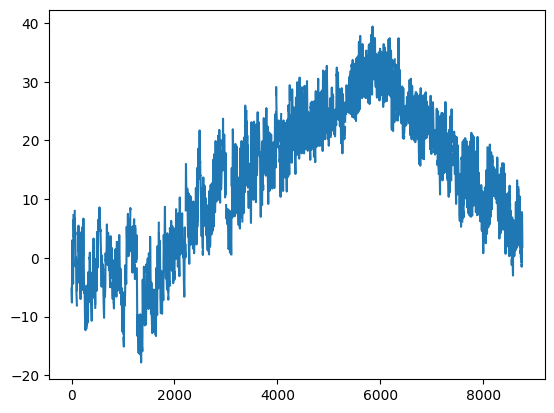

In [29]:
# что это? - линейный график
bikes['Temperature'].plot()

<AxesSubplot: >

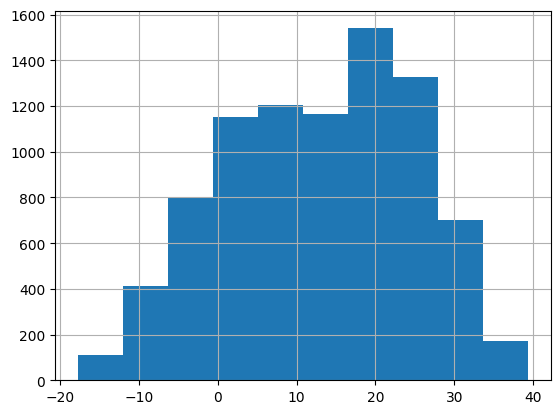

In [30]:
# что это? - гистограмма
bikes['Temperature'].hist()

<AxesSubplot: >

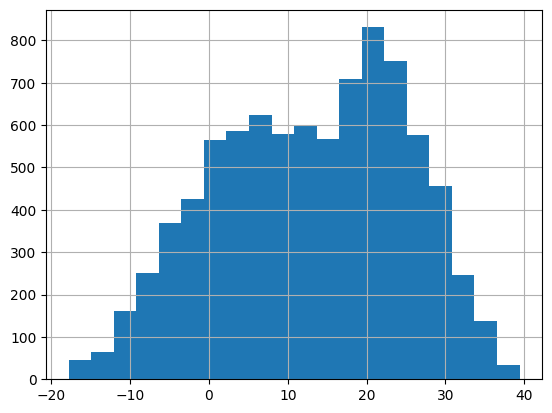

In [31]:
# увеличим кол-во столбиков
bikes['Temperature'].hist(bins=20)

<AxesSubplot: >

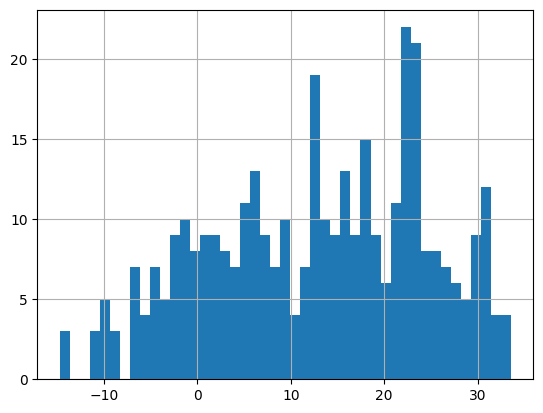

In [37]:
# Нарисуйте гистограмму про то, сколько дней было с какой средней температурой
bikes.groupby('Date')['Temperature'].mean().hist(bins=45)

В чём разница между гистограммой и столбчатой диаграммой?

Сейчас нарисуем столбчатую:

<AxesSubplot: >

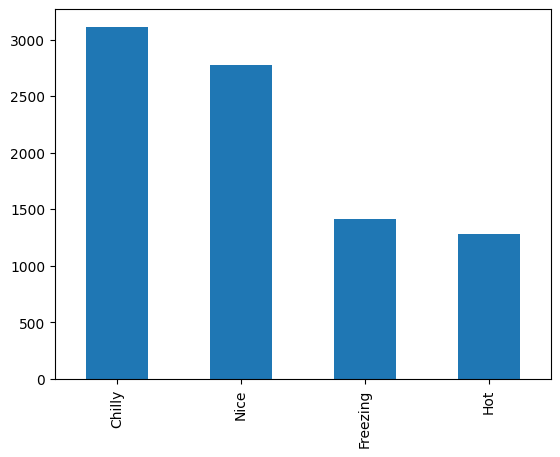

In [38]:
bikes['Temperature Category'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Temperature Category'>

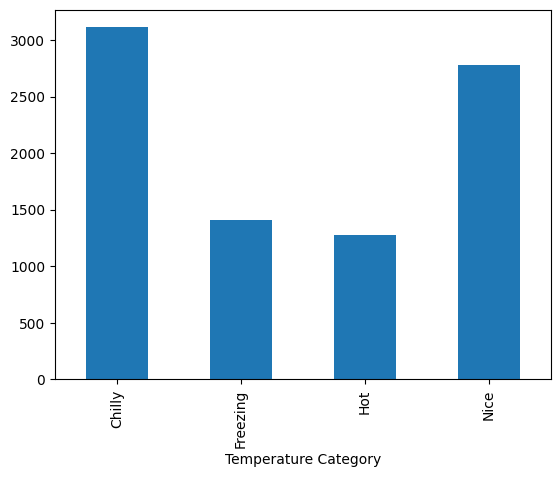

In [39]:
bikes.groupby('Temperature Category').size().plot(kind='bar')

Между столбцами промежутки, столбцы рассказывают об отдельных категориях, между ними нет промежуточных значений и плавных переходов

Какая погода в какой из сезонов?

<AxesSubplot: xlabel='Seasons,Temperature Category'>

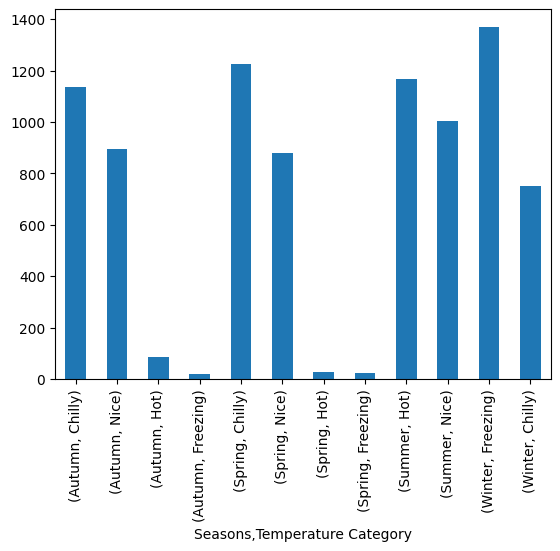

In [40]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().plot(kind='bar')

In [41]:
bikes.groupby('Seasons')['Temperature Category'].value_counts()

Seasons  Temperature Category
Autumn   Chilly                  1138
         Nice                     894
         Hot                       86
         Freezing                  20
Spring   Chilly                  1224
         Nice                     881
         Hot                       27
         Freezing                  22
Summer   Hot                     1166
         Nice                    1003
Winter   Freezing                1370
         Chilly                   750
Name: Temperature Category, dtype: int64

In [42]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack()

Temperature Category,Chilly,Freezing,Hot,Nice
Seasons,,,,
Autumn,1138.0,20.0,86.0,894.0
Spring,1224.0,22.0,27.0,881.0
Summer,NaN,NaN,1166.0,1003.0
Winter,750.0,1370.0,NaN,NaN


[Ссылка на картинки про формы таблиц](https://medium.com/@bigdataschool/4-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8-%D0%B4%D0%BB%D1%8F-%D0%B8%D0%B7%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F-%D1%84%D0%BE%D1%80%D0%BC-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86-%D0%B2-pandas-d0d9f7ca40e3)

<AxesSubplot: xlabel='Seasons'>

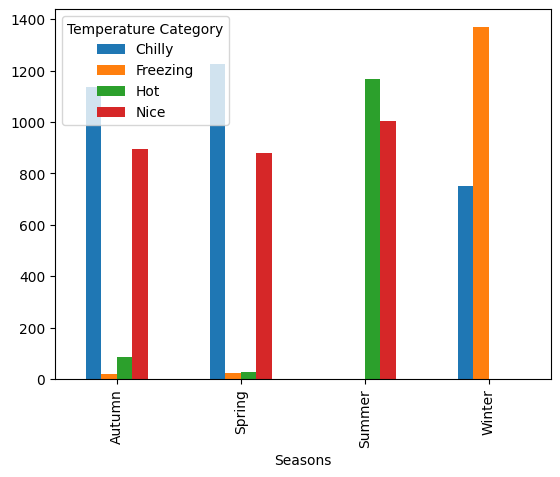

In [43]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind='bar')

Лучше ещё цвета поправить, чтоб `Freezing` было синим, а `Hot` красным. Но это в следующих сериях.

<AxesSubplot: xlabel='Seasons'>

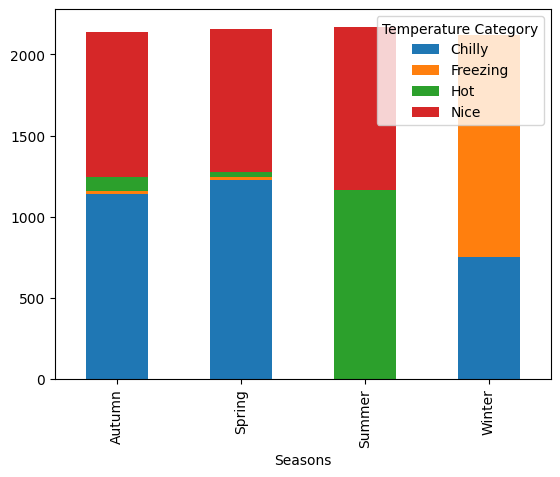

In [44]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind='bar',
                                                                               stacked=True)